Imports

In [1]:
import backtrader as bt
from datetime import datetime
import yfinance as yf
import pickle
import matplotlib

from strategies import Keltner, LogReg

Cerebro Instance

In [2]:
cerebro = bt.Cerebro()

Market Data

In [3]:
"GC=F" # Gold
"^GSPC" # S&P500

data = yf.download("^GSPC", interval="1m") #must match name of agent

feed = bt.feeds.PandasDirectData(dataname = data)

cerebro.adddata(feed)

data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-01-19 15:00:00-05:00,3917.620117,3919.719971,3917.620117,3919.719971,3919.719971,0
2023-01-19 15:01:00-05:00,3919.909912,3920.189941,3919.350098,3919.500000,3919.500000,4040000
2023-01-19 15:02:00-05:00,3919.510010,3920.360107,3918.949951,3920.239990,3920.239990,3545000
2023-01-19 15:03:00-05:00,3920.260010,3920.770020,3919.870117,3920.750000,3920.750000,3294000
2023-01-19 15:04:00-05:00,3920.760010,3921.129883,3920.540039,3920.560059,3920.560059,3673000


Portfolio Balance

In [4]:
init_balance = 4113

cerebro.broker.setcash(init_balance)

Loading Strategy

In [5]:
cerebro.addstrategy(LogReg)

sizer = bt.sizers.PercentSizer

cerebro.addsizer(sizer)

Running Strategy

In [6]:
cerebro.run()

Results

Final Portfolio Value: £4113.0
P/L: £0.0


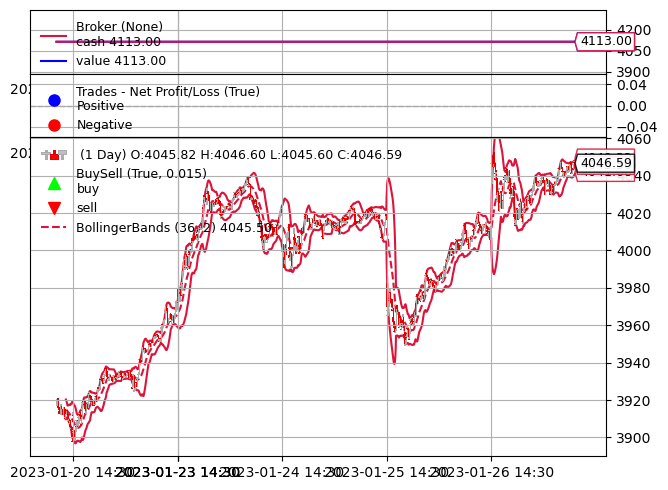

[[<Figure size 640x480 with 3 Axes>]]

In [9]:
portvalue = cerebro.broker.getvalue()
pnl = portvalue - init_balance

print(f'Final Portfolio Value: £{portvalue}')
print(f'P/L: £{pnl}')

%matplotlib inline

cerebro.plot(iplot=False, style="candlestick", volume = False, filename='plot.png' )
